# **Indian Foods Clssification**

In [108]:
# Importing Libraries

import numpy as np
import pandas as pd

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as imgen
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Model,Sequential,load_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from keras.applications.xception import Xception

from keras.callbacks import EarlyStopping,ModelCheckpoint

###  **Reading and Augmenting Data**

In [111]:
traingen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

valgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input,
                #rescale=1./255,
                zoom_range=0.2,
                 shear_range=0.2,
                 horizontal_flip=True
                )

testgen = imgen(preprocessing_function=keras.applications.xception.preprocess_input)
               #rescale=1./255)

In [112]:
train_data = traingen.flow_from_directory("../input/indian-food-classification/dataset/Dataset/train",
                                         target_size=(299,299),
                                          seed = 123,
                                          batch_size=32,
                                          class_mode = "categorical"
                                         )
val_data = valgen.flow_from_directory("../input/indian-food-classification/dataset/Dataset/val",
                                     target_size=(299,299),
                                      seed = 123,
                                      batch_size=32,
                                      class_mode = "categorical"
                                     )

test_data = testgen.flow_from_directory("../input/indian-food-classification/test",
                                       shuffle=False,
                                        target_size = (299,299),
                                        seed = 123,
                                        batch_size = 32,
                                        class_mode = "categorical"
                                       )

Found 3996 images belonging to 20 classes.
Found 1250 images belonging to 20 classes.
Found 585 images belonging to 20 classes.


**Getting the calass names**

In [113]:
cl = train_data.class_indices
classes = list(cl.keys())
classes

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

**Distribution of classes**

In [114]:
cl_fq = train_data.classes

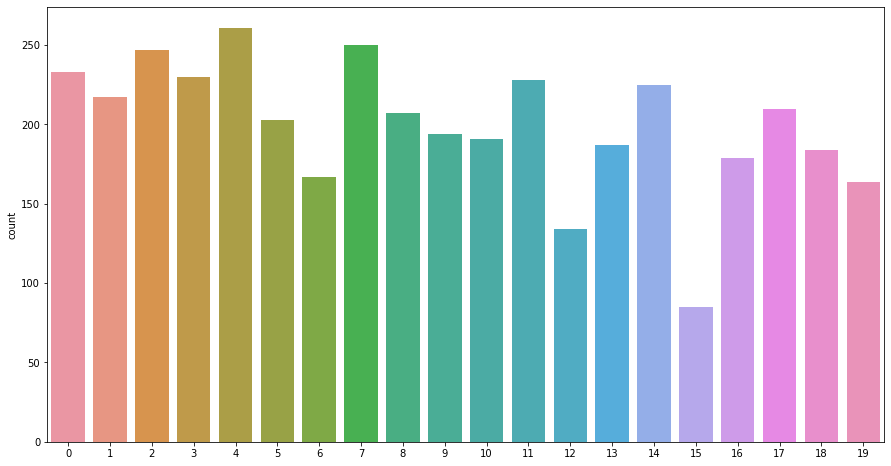

In [115]:
plt.figure(figsize=[15,8])
sns.countplot(x =cl_fq);

**Taking a look at some Images**

In [116]:
# one Batch
x,y = next(train_data)
x.shape

(32, 299, 299, 3)

In [117]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

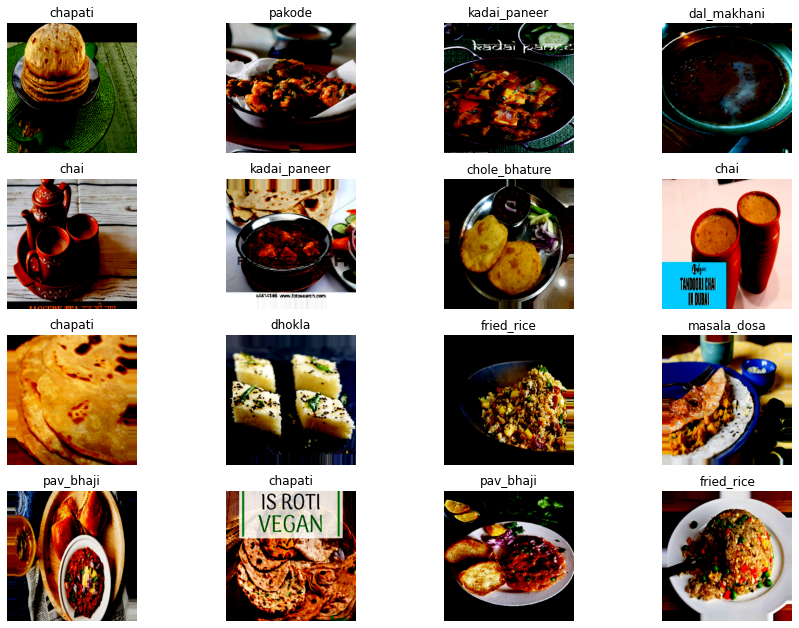

In [118]:
plotImages(x,y)

## **Model Building**

**Getting a Pre-Trained Model**

In [119]:
base_model = Xception(include_top=False,
                              weights="imagenet",
                              input_shape=(299,299,3),
                        )
base_model.trainable = False

83689472/83683744 [==============================] - 1s 0us/step


In [120]:
# Transfer to main model
image_input = Input(shape=(299,299,3))

x = base_model(image_input,training = False)

x = GlobalAveragePooling2D()(x)

x = Dense(128,activation = "relu")(x)

image_output = Dense(20,activation="softmax")(x)

model = Model(image_input,image_output)

**Compile**

In [121]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

**Callbacks**

In [122]:
my_calls = [EarlyStopping(monitor="val_accuracy",patience=3),
            ModelCheckpoint("Model.h5",verbose= 1 ,save_best_only=True)]

**Train**

In [123]:
hist = model.fit(train_data,epochs=22,validation_data=val_data,callbacks=my_calls)

Epoch 1/22
  7/125 [>.............................] - ETA: 2:04 - loss: 2.9399 - accuracy: 0.0966

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


 61/125 [=============>................] - ETA: 1:20 - loss: 2.1343 - accuracy: 0.4375

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


125/125 [==============================] - 213s 2s/step - loss: 1.6642 - accuracy: 0.5712 - val_loss: 0.5573 - val_accuracy: 0.8344

Epoch 00001: val_loss improved from inf to 0.55729, saving model to Model.h5
Epoch 2/22
125/125 [==============================] - 205s 2s/step - loss: 0.4115 - accuracy: 0.8865 - val_loss: 0.4522 - val_accuracy: 0.8784

Epoch 00002: val_loss improved from 0.55729 to 0.45219, saving model to Model.h5
Epoch 3/22
125/125 [==============================] - 209s 2s/step - loss: 0.2934 - accuracy: 0.9078 - val_loss: 0.4150 - val_accuracy: 0.8840

Epoch 00003: val_loss improved from 0.45219 to 0.41503, saving model to Model.h5
Epoch 4/22
125/125 [==============================] - 207s 2s/step - loss: 0.2452 - accuracy: 0.9259 - val_loss: 0.4201 - val_accuracy: 0.8832

Epoch 00004: val_loss did not improve from 0.41503
Epoch 5/22
125/125 [==============================] - 207s 2s/step - loss: 0.1909 - accuracy: 0.9440 - val_loss: 0.3710 - val_accuracy: 0.8912

E

**Test**

In [124]:
model.evaluate(test_data)

19/19 [==============================] - 3s 142ms/step - loss: 0.6994 - accuracy: 0.8342


[0.6993985176086426, 0.8341880440711975]

**Accuracy and loss**

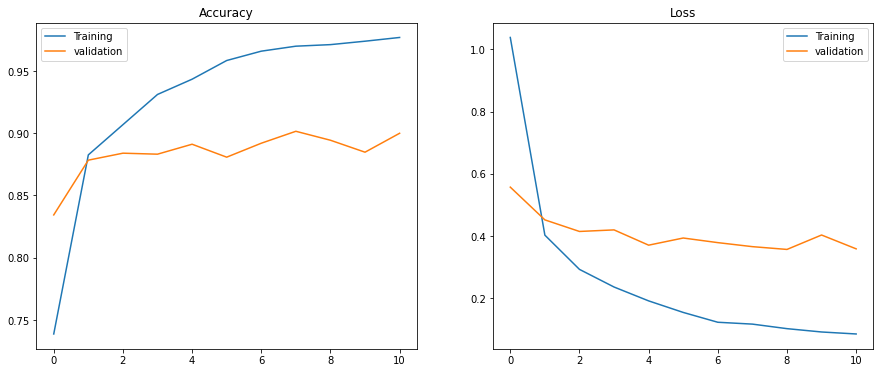

In [125]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

**Saved model**

In [126]:
saved_model = load_model("./Model.h5")

**Making Predictions**

In [127]:
pred = saved_model.predict(test_data,verbose=1)

19/19 [==============================] - 3s 137ms/step


In [128]:
pred = [np.argmax(i) for i in pred]
y_test = test_data.classes

In [129]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        22
           1       0.79      0.79      0.79        29
           2       0.97      0.88      0.92        33
           3       0.71      0.77      0.74        26
           4       0.81      0.93      0.87        28
           5       0.64      0.59      0.62        27
           6       1.00      0.96      0.98        24
           7       0.61      1.00      0.76        17
           8       0.96      0.82      0.89        33
           9       0.90      1.00      0.95        26
          10       0.96      0.70      0.81        37
          11       0.93      0.72      0.81        36
          12       0.81      0.86      0.83        29
          13       0.62      0.95      0.75        19
          14       0.90      0.75      0.82        36
          15       0.83      0.81      0.82        31
          16       0.94      0.79      0.86        38
          17       0.94    

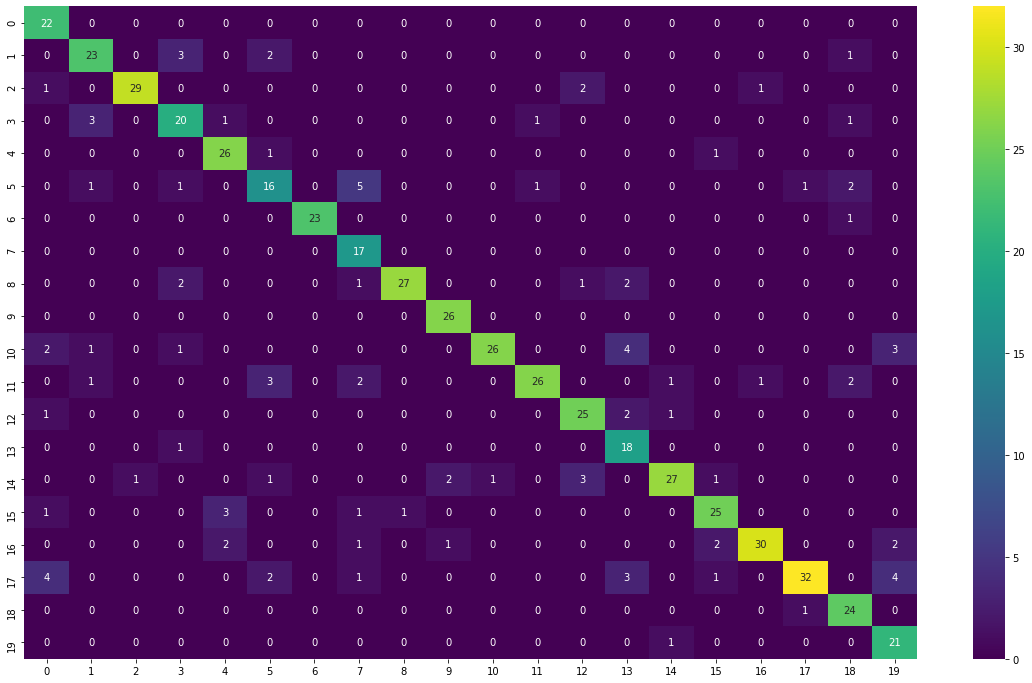

In [132]:
plt.figure(figsize=[20,12])
sns.heatmap(confusion_matrix(pred,y_test),annot=True,fmt="d",cmap="viridis");